In [2]:
# !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [3]:
import torch
import cvzone
print(torch.__version__)

2.0.1+cu118


In [4]:
if torch.cuda.is_available():
    print("available")
    print(torch.cuda.device_count())
else:
    print("back to the drawing board")

available
1


In [5]:
from ultralytics import YOLO

model = YOLO("yolov8l.pt")

In [6]:
import os

print(os.listdir(os.getcwd()))

['image_mask.png', 'RoadTraffic.mp4', 'test.ipynb', 'yolov8l.pt', 'yolov8n-seg.pt']


In [7]:
import numpy as np
import pandas as pd

def display_text(text, frame, position):
    x, y = position
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    font_color = (255, 255, 255)  # White color
    font_thickness = 2
    text_size, _ = cv2.getTextSize(text, font, font_scale, font_thickness)
    width, height = text_size
    cv2.rectangle(frame, (x , y-8 - height), ((x + 10 + width), (y)), (0, 0, 0), thickness = cv2.FILLED)
    cv2.putText(frame , text, (x+6, y -height + 4), font, font_scale, font_color, font_thickness)

In [8]:
import cv2
import time

cap = cv2.VideoCapture("RoadTraffic.mp4")
image_mask = cv2.imread("image_mask.png")
FPS = 45

if not cap.isOpened():
    print("error opening camera/video")

cars_per_frame = []

frames = 0
while True:
    start_time = time.time()
    ret, frame = cap.read()
    frames += 1
    if frames % 30 != 0:
        continue
    masked_frame = cv2.bitwise_and(image_mask, frame)
    if not ret:
        print("Could not read frame correctly")
        break
    try:
        results = model.predict(masked_frame)
        result_arr = results[0].boxes.data
        item_dict = results[0].names
        for result in result_arr:
            result_ref = [int(coord) for coord in result]
            # cv2.rectangle(frame, result_ref[:2], result_ref[2:4], (120, int(result[5])/80 * 255, (1-int(result[5]))/80 * 255), 2)
            # display_text(item_dict[int(result_ref[5])], frame, result_ref[:2])
    except Exception as e:
        print("Error occurred in prediction")
        print(str(e))
        break
    # display_text(f'Count: {len(result_arr)}', frame, (100, 100))
    # cv2.imshow('Live Camera Feed', frame)

    cars_per_frame.append((frames, len(result_arr)))
    if frames > 1900*30:
        break
    comp_time = time.time() - start_time
    delay = max(0, 1/(FPS - comp_time))
    # if cv2.waitKey(int(delay*1000)) & 0xFF == ord('q'):
    #     break

cars_arr = np.array(cars_per_frame)
print(cars_arr.shape)
cap.release()
cv2.destroyAllWindows()


0: 384x640 7 cars, 1 truck, 166.1ms
Speed: 5.0ms preprocess, 166.1ms inference, 7.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 2 trucks, 23.1ms
Speed: 3.1ms preprocess, 23.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 2 trucks, 21.0ms
Speed: 2.0ms preprocess, 21.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 2 trucks, 21.0ms
Speed: 2.0ms preprocess, 21.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 2 trucks, 20.0ms
Speed: 2.0ms preprocess, 20.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 cars, 3 trucks, 21.0ms
Speed: 2.0ms preprocess, 21.0ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 1 truck, 20.0ms
Speed: 2.0ms preprocess, 20.0ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 20.0ms
Speed: 3.0ms preprocess, 20.0ms inf

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:214: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'cv::binary_op'


In [9]:
frames_arr = np.array(cars_per_frame)
print(frames_arr.shape)

(1706, 2)


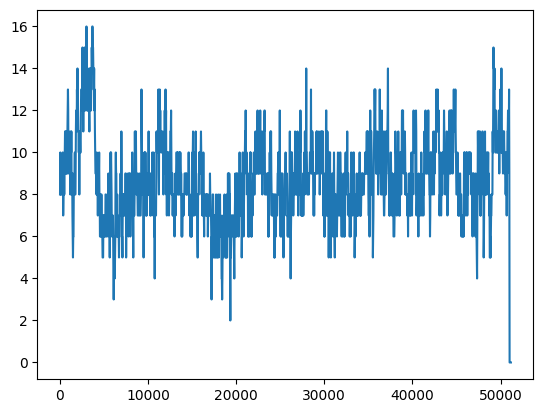

In [11]:
import matplotlib.pyplot as plt

plt.plot(frames_arr[:, 0], frames_arr[:, 1])

In [ ]:
print(len(frames))

In [ ]:
# torch.cuda.empty_cache()
# cap.release()
# cv2.destroyAllWindows()